<a href="https://colab.research.google.com/github/mishravimal99/CartoonizationUsingOpenCV/blob/master/Cartoonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
num_down=2 #number of downsampling steps
num_bilateral=7 #number of bilateral filtering steps

#1.Reading image and resizing it



---



In [4]:
img_rgb=cv2.imread("/content/IMG_20190628_130702.jpg") #reading the image
print(img_rgb.shape) #prints dimension of the picture

(657, 493, 3)


In [5]:
img_rgb=cv2.resize(img_rgb,(800,800)) #resize image to get optimal results

#2. Downsampling image and then applying bilateral filter 

---

In [8]:
#downsampling image using gaussian pyramid
img_color=img_rgb
for _ in range(num_down):
  img_color=cv2.pyrDown(img_color)

In [9]:
#repeatedly applying small bilateral filter instead of applying one large filter
for _ in range(num_bilateral):
  img_color=cv2.bilateralFilter(img_color,d=9,sigmaColor=9,sigmaSpace=7)

#3. Converting image to grayscale,apply median blur and then thresholding 

---







In [10]:
#unsample image to original size
for _ in range(num_down):
  img_color=cv2.pyrUp(img_color)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_blur=cv2.medianBlur(img_gray,7)
img_edge=cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=9,C=2)

#4. Display the resultant image

---







In [11]:
#convert image back to color, bit-AND with color image
img_edge=cv2.cvtColor(img_edge,cv2.COLOR_GRAY2RGB)
img_cartoon=cv2.bitwise_and(img_color,img_edge)

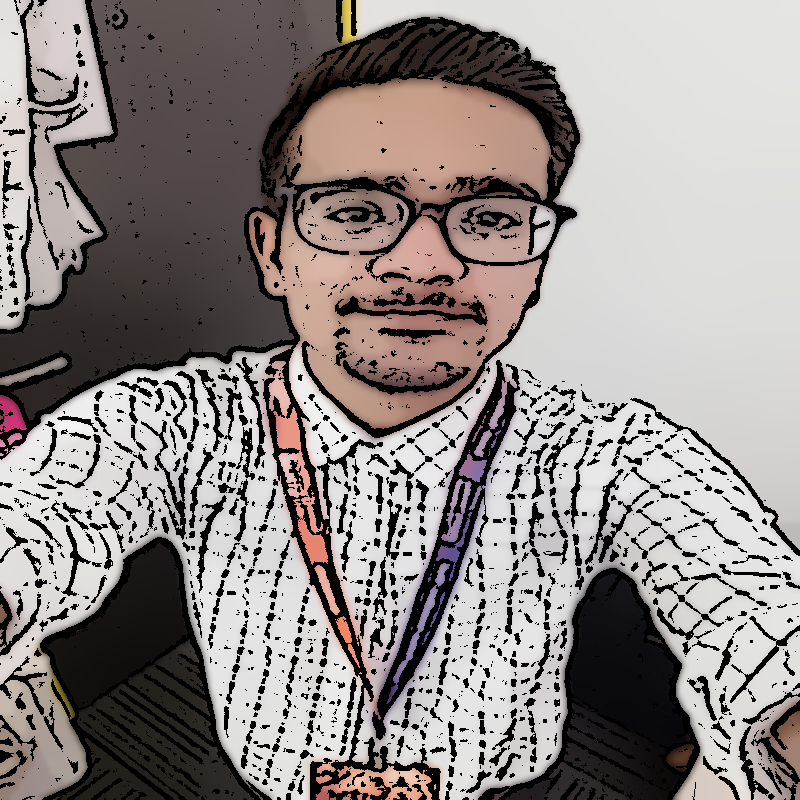

In [15]:
#display image
from google.colab.patches import cv2_imshow
cv2_imshow(img_cartoon)

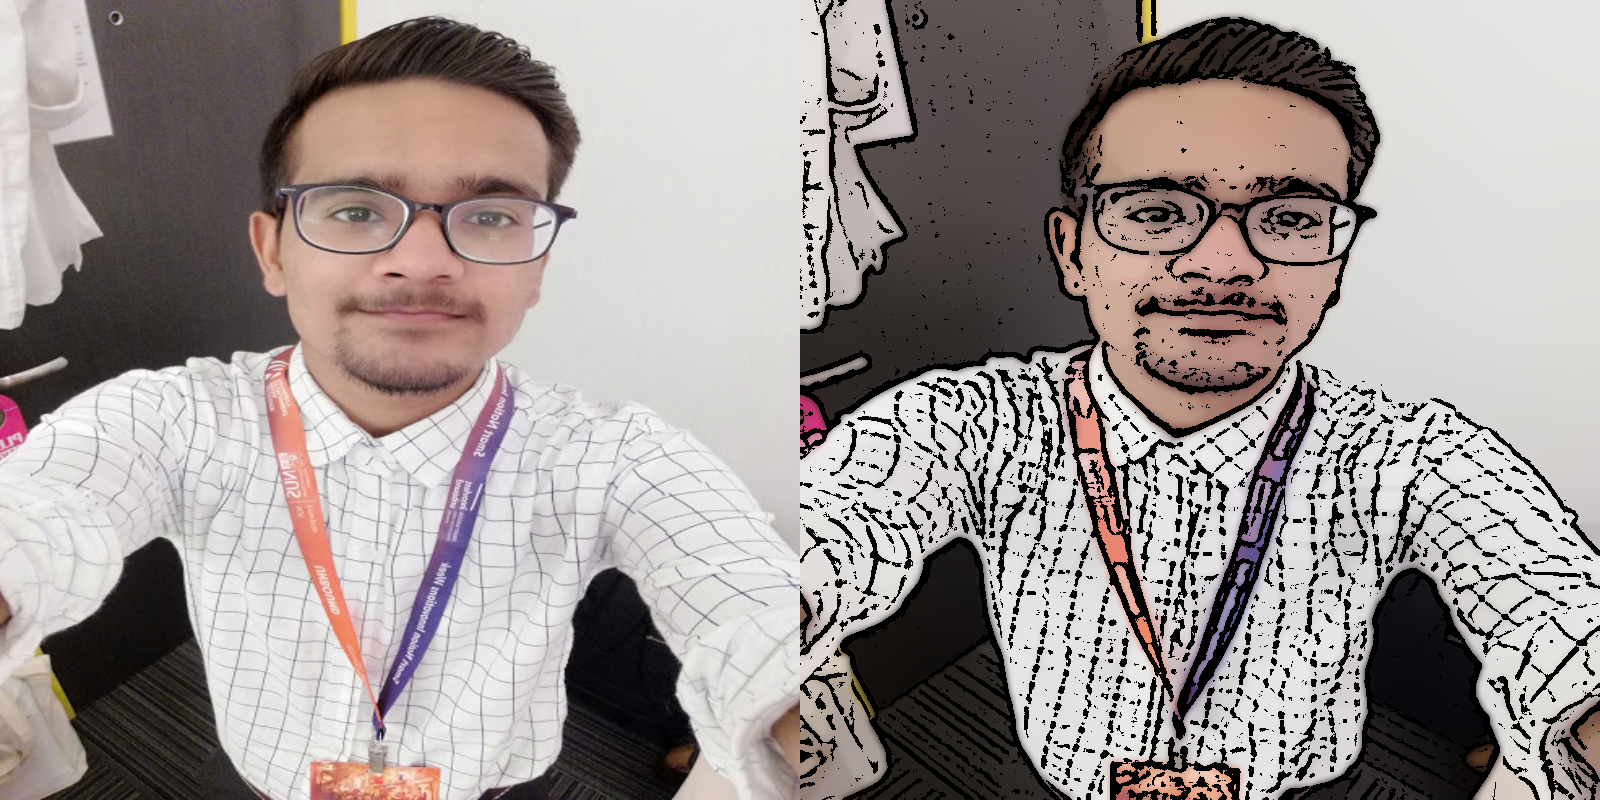

In [18]:
stack=np.hstack([img_rgb,img_cartoon])
cv2_imshow(stack)

In [ ]:
cv2.waitkey(0)